In [1]:
import pandas as pd
import os
import json

# Define the path to the output folder
output_folder = '/workspaces/cwl-data/output/structured-2018-04-08-proleague1'

# Initialize an empty list to store the data
data = []

# Loop through all files in the output folder
for filename in os.listdir(output_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(output_folder, filename)
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            data.append(json_data)

# Create a DataFrame from the list of data
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

  title platform                                    id   series_id  \
0   ww2      ps4  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10   
1   ww2      ps4  ab7e12d2-8217-5561-b6c8-927431692315   pro1-a2-7   
2   ww2      ps4  f8898cb4-cd99-5083-9d23-4199baa63001   pro1-b4-4   
3   ww2      ps4               missing-pro1-a4-7-map-3   pro1-a4-7   
4   ww2      ps4  7a620e83-ce6b-5286-876f-74c81d7952f9   pro1-b1-9   

   start_time_s  end_time_s  duration_ms              mode  \
0    1519269582  1519270242       660000  Capture The Flag   
1    1517439951  1517440618       667000         Hardpoint   
2    1521597507  1521598290       783000  Capture The Flag   
3    1519860288  1519860888       600000  Capture The Flag   
4    1518052699  1518053000       301000  Search & Destroy   

                    map  rounds  \
0       Ardennes Forest       2   
1  Sainte Marie du Mont       1   
2            Flak Tower       4   
3       Ardennes Forest       1   
4       Ardennes Forest       7

In [2]:
expanded_rows = []

for _, row in df.iterrows():
    title = row['title']
    map_name = row['map']
    mode = row['mode']
    game_id = row['id']
    series_id = row['series_id']
    start_time_s = row['start_time_s']
    
    for event in row['events']:
        if event['type'] == 'death':
            event_data = event['data']
            expanded_row = {
                'title': title,
                'map': map_name,
                'mode': mode,
                'id': game_id,
                'series_id': series_id,
                'start_time_s': start_time_s,
                'event_type': event['type'],
                'time_ms': event['time_ms'],
                'victim_id': event_data['id'],
                'attacker_id': event_data['attacker']['id'],
                'attacker_weapon': event_data['attacker']['weapon'],
                'pos_x': event_data['pos']['x'],
                'pos_y': event_data['pos']['y'],
                'attacker_pos_x': event_data['attacker']['pos']['x'],
                'attacker_pos_y': event_data['attacker']['pos']['y'],
                'means_of_death': event_data['attacker']['means_of_death']
            }
            expanded_rows.append(expanded_row)

expanded_df = pd.DataFrame(expanded_rows)
print(expanded_df.head())

  title              map              mode  \
0   ww2  Ardennes Forest  Capture The Flag   
1   ww2  Ardennes Forest  Capture The Flag   
2   ww2  Ardennes Forest  Capture The Flag   
3   ww2  Ardennes Forest  Capture The Flag   
4   ww2  Ardennes Forest  Capture The Flag   

                                     id   series_id  start_time_s event_type  \
0  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      death   
1  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      death   
2  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      death   
3  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      death   
4  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      death   

   time_ms victim_id attacker_id attacker_weapon  pos_x  pos_y  \
0        0      JOEE        JOEE         unknown  240.0  364.0   
1        0   GUNLESS     GUNLESS         unknown  850.0  583.0   
2     9400      JOEE     GUNLESS         PPS

In [3]:
expanded_players = []

for _, row in df.iterrows():
    title = row['title']
    map_name = row['map']
    mode = row['mode']
    game_id = row['id']
    series_id = row['series_id']
    start_time_s = row['start_time_s']
    
    for player in row['players']:
        expanded_player = {
            'title': title,
            'map': map_name,
            'mode': mode,
            'id': game_id,
            'series_id': series_id,
            'start_time_s': start_time_s,
            'player_id': player['name'],
            'fave_weapon': player['fave_weapon']
        }
        expanded_players.append(expanded_player)

expanded_players_df = pd.DataFrame(expanded_players)
print(expanded_players_df.head())

  title              map              mode  \
0   ww2  Ardennes Forest  Capture The Flag   
1   ww2  Ardennes Forest  Capture The Flag   
2   ww2  Ardennes Forest  Capture The Flag   
3   ww2  Ardennes Forest  Capture The Flag   
4   ww2  Ardennes Forest  Capture The Flag   

                                     id   series_id  start_time_s player_id  \
0  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582   GUNLESS   
1  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582     LOONY   
2  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582   METHODZ   
3  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582    TJHALY   
4  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      JOEE   

  fave_weapon  
0      STG-44  
1     PPSh-41  
2      STG-44  
3     PPSh-41  
4     PPSh-41  


In [4]:
# Select specific columns from the expanded dataframe
selected_columns = ['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id', 'time_ms']

# Create a new dataset with the selected columns
attacker_list_df = expanded_df[selected_columns]

# Display the first few rows of the new dataset
print(attacker_list_df.head())

  title              map              mode  \
0   ww2  Ardennes Forest  Capture The Flag   
1   ww2  Ardennes Forest  Capture The Flag   
2   ww2  Ardennes Forest  Capture The Flag   
3   ww2  Ardennes Forest  Capture The Flag   
4   ww2  Ardennes Forest  Capture The Flag   

                                     id   series_id  start_time_s attacker_id  \
0  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582        JOEE   
1  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582     GUNLESS   
2  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582     GUNLESS   
3  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582      TJHALY   
4  e2c58665-e66c-54a6-af6e-f7658c88367c  pro1-a3-10    1519269582        ZER0   

   time_ms  
0        0  
1        0  
2     9400  
3    11800  
4    12250  


In [81]:
## create a copy of expanded_df 
was_victim_killer_in_prev_5000ms = expanded_df.copy()

## join the copy with attacker_list_df on title, map, mode, id, series_id, start_time_s, victim_id = attacker_id
was_victim_killer_in_prev_5000ms = was_victim_killer_in_prev_5000ms.merge(
    attacker_list_df,
    left_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'victim_id'],
    right_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id'],
    how='inner',
    suffixes=('', '_kill')
)

## filter where time_ms_kill between time_ms and time_ms - 5000
was_victim_killer_in_prev_5000ms = was_victim_killer_in_prev_5000ms[
    (was_victim_killer_in_prev_5000ms['time_ms_kill'] < was_victim_killer_in_prev_5000ms['time_ms']) &
    (was_victim_killer_in_prev_5000ms['time_ms_kill'] > was_victim_killer_in_prev_5000ms['time_ms'] - 5000)
]

## now get distinct rows by title, map, mode, id, series_id, start_time_s, victim_id, and time_ms
was_victim_killer_in_prev_5000ms = was_victim_killer_in_prev_5000ms.drop_duplicates(
    subset=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'victim_id', 'time_ms'],
    ignore_index=True
)[['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'victim_id', 'time_ms']]

## add a column called victim_kill_in_prev_5000ms and set it to true
was_victim_killer_in_prev_5000ms['victim_kill_in_prev_5000ms'] = True

# ## head
# was_victim_killer_in_prev_5000ms.head()



# Create a copy of expanded_df
was_attacker_killer_in_prev_5000ms = expanded_df.copy()

# Join the copy with attacker_list_df on title, map, mode, id, series_id, start_time_s, attacker_id = attacker_id
was_attacker_killer_in_prev_5000ms = was_attacker_killer_in_prev_5000ms.merge(
    attacker_list_df,
    left_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id'],
    right_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id'],
    how='inner',
    suffixes=('', '_kill')
)

# Filter where time_ms_kill between time_ms and time_ms - 5000
was_attacker_killer_in_prev_5000ms = was_attacker_killer_in_prev_5000ms[
    (was_attacker_killer_in_prev_5000ms['time_ms_kill'] < was_attacker_killer_in_prev_5000ms['time_ms']) &
    (was_attacker_killer_in_prev_5000ms['time_ms_kill'] > was_attacker_killer_in_prev_5000ms['time_ms'] - 5000)
]

# Now get distinct rows by title, map, mode, id, series_id, start_time_s, attacker_id, and time_ms
was_attacker_killer_in_prev_5000ms = was_attacker_killer_in_prev_5000ms.drop_duplicates(
    subset=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id', 'time_ms'],
    ignore_index=True
)[['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id', 'time_ms']]

# Add a column called attacker_kill_in_prev_5000ms and set it to true
was_attacker_killer_in_prev_5000ms['attacker_kill_in_prev_5000ms'] = True

# # Display the first few rows of the new dataframe
# was_attacker_killer_in_prev_5000ms.head()

## first merge was_victim_killer_in_prev_5000ms with expanded_df on title, map, mode, id, series_id, start_time_s, victim_id, time_ms
expanded_df_with_prev_eng = expanded_df.merge(
    was_victim_killer_in_prev_5000ms,
    on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'victim_id', 'time_ms'],
    how='left'
)

## then merge was_attacker_killer_in_prev_5000ms with expanded_df_with_prev_eng on title, map, mode, id, series_id, start_time_s, attacker_id, time_ms
expanded_df_with_prev_eng = expanded_df_with_prev_eng.merge(
    was_attacker_killer_in_prev_5000ms,
    on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id', 'time_ms'],
    how='left'
)

## fill NaN values in victim_kill_in_prev_5000ms and attacker_kill_in_prev_5000ms with False
expanded_df_with_prev_eng['victim_kill_in_prev_5000ms'] = expanded_df_with_prev_eng['victim_kill_in_prev_5000ms'].fillna(False)
expanded_df_with_prev_eng['attacker_kill_in_prev_5000ms'] = expanded_df_with_prev_eng['attacker_kill_in_prev_5000ms'].fillna(False)

## now join in expanded_players_df on victim_id = player_id to get fave_weapon
expanded_df_with_prev_eng = expanded_df_with_prev_eng.merge(
    expanded_players_df,
    left_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'victim_id'],
    right_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'player_id'],
    how='left'
)

## drop cols
expanded_df_with_prev_eng = expanded_df_with_prev_eng.drop(
    columns=['player_id']
)

## now join in expanded_players_df on attacker_id = player_id to get fave_weapon
expanded_df_with_prev_eng = expanded_df_with_prev_eng.merge(
    expanded_players_df,
    left_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'attacker_id'],
    right_on=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'player_id'],
    how='left',
    suffixes=('', '_attacker')
)

## drop cols
expanded_df_with_prev_eng = expanded_df_with_prev_eng.drop(
    columns=['player_id']
)

# Reorder expanded_df_with_prev_eng to sort by title, map, mode, id, series_id, start_time_s, and time_ms
expanded_df_with_prev_eng = expanded_df_with_prev_eng.sort_values(
    by=['title', 'map', 'mode', 'id', 'series_id', 'start_time_s', 'time_ms']
)

# Display the first few rows of the sorted dataframe
expanded_df_with_prev_eng.head()


/tmp/ipykernel_2247/3083651777.py:78: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  expanded_df_with_prev_eng['victim_kill_in_prev_5000ms'] = expanded_df_with_prev_eng['victim_kill_in_prev_5000ms'].fillna(False)
/tmp/ipykernel_2247/3083651777.py:79: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  expanded_df_with_prev_eng['attacker_kill_in_prev_5000ms'] = expanded_df_with_prev_eng['attacker_kill_in_prev_5000ms'].fillna(False)


,title,map,mode,id,series_id,start_time_s,event_type,time_ms,victim_id,attacker_id,attacker_weapon,pos_x,pos_y,attacker_pos_x,attacker_pos_y,means_of_death,victim_kill_in_prev_5000ms,attacker_kill_in_prev_5000ms,fave_weapon,fave_weapon_attacker
24568,ww2,Ardennes Forest,Capture The Flag,00099d3b-f31b-5a26-b899-de3a90cab761,pro1-a2-5,1517364495,death,0,DENZ,DENZ,unknown,848.0,638.0,848.0,638.0,suicide,False,False,FG 42,FG 42
24569,ww2,Ardennes Forest,Capture The Flag,00099d3b-f31b-5a26-b899-de3a90cab761,pro1-a2-5,1517364495,death,8800,FIGHTA,KENNY,FG 42,345.0,724.0,606.0,720.0,rifle_bullet,False,False,PPSh-41,PPSh-41
24570,ww2,Ardennes Forest,Capture The Flag,00099d3b-f31b-5a26-b899-de3a90cab761,pro1-a2-5,1517364495,death,22200,THEORY,BUZZO,FG 42,449.0,468.0,474.0,260.0,rifle_bullet,False,False,PPSh-41,FG 42
24571,ww2,Ardennes Forest,Capture The Flag,00099d3b-f31b-5a26-b899-de3a90cab761,pro1-a2-5,1517364495,death,30450,KENNY,DENZ,FG 42,505.0,550.0,512.0,742.0,rifle_bullet,False,False,PPSh-41,FG 42
24572,ww2,Ardennes Forest,Capture The Flag,00099d3b-f31b-5a26-b899-de3a90cab761,pro1-a2-5,1517364495,death,31550,ACCURACY,BUZZO,FG 42,598.0,418.0,489.0,284.0,rifle_bullet,False,False,FG 42,FG 42


In [82]:
# Filter the expanded dataframe to include only specific means of death and mode 'Hardpoint'
filtered_df = expanded_df_with_prev_eng[
    (expanded_df_with_prev_eng['means_of_death'].isin(['pistol_bullet', 'rifle_bullet', 'head_shot', 'melee'])) &
    (expanded_df_with_prev_eng['mode'] == 'Hardpoint') &
    (expanded_df_with_prev_eng['attacker_weapon'] != 'Fighter Pilot')
]

# Display the first few rows of the filtered dataframe
print(filtered_df.head())

     title              map       mode                                    id  \
5484   ww2  Ardennes Forest  Hardpoint  31e55d08-8620-5f57-a5f6-bb11cb54ae18   
5485   ww2  Ardennes Forest  Hardpoint  31e55d08-8620-5f57-a5f6-bb11cb54ae18   
5486   ww2  Ardennes Forest  Hardpoint  31e55d08-8620-5f57-a5f6-bb11cb54ae18   
5487   ww2  Ardennes Forest  Hardpoint  31e55d08-8620-5f57-a5f6-bb11cb54ae18   
5488   ww2  Ardennes Forest  Hardpoint  31e55d08-8620-5f57-a5f6-bb11cb54ae18   

      series_id  start_time_s event_type  time_ms victim_id attacker_id  \
5484  pro1-b4-2    1521586498      death     7350     REEDY       ACHES   
5485  pro1-b4-2    1521586498      death     8600    VORTEX    NAMELESS   
5486  pro1-b4-2    1521586498      death    10400     ACHES      HAWQEH   
5487  pro1-b4-2    1521586498      death    10700     DQVEE      ENABLE   
5488  pro1-b4-2    1521586498      death    12450    HAWQEH      APATHY   

     attacker_weapon  pos_x  pos_y  attacker_pos_x  attacker_pos_y  

In [83]:
filtered_df.head()

,title,map,mode,id,series_id,start_time_s,event_type,time_ms,victim_id,attacker_id,attacker_weapon,pos_x,pos_y,attacker_pos_x,attacker_pos_y,means_of_death,victim_kill_in_prev_5000ms,attacker_kill_in_prev_5000ms,fave_weapon,fave_weapon_attacker
5484,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,death,7350,REEDY,ACHES,STG-44,448.0,577.0,638.0,518.0,rifle_bullet,False,False,PPSh-41,STG-44
5485,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,death,8600,VORTEX,NAMELESS,STG-44,450.0,247.0,614.0,431.0,rifle_bullet,False,False,PPSh-41,STG-44
5486,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,death,10400,ACHES,HAWQEH,STG-44,629.0,490.0,407.0,560.0,rifle_bullet,True,False,STG-44,STG-44
5487,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,death,10700,DQVEE,ENABLE,PPSh-41,444.0,409.0,654.0,282.0,pistol_bullet,False,False,STG-44,PPSh-41
5488,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,death,12450,HAWQEH,APATHY,PPSh-41,401.0,538.0,464.0,568.0,pistol_bullet,True,False,STG-44,PPSh-41


In [85]:
## add a new col called distance_between_victim_and_attacker and set it to the distance between the two points
filtered_df.loc[:, 'distance_between_victim_and_attacker'] = (
    (filtered_df.loc[:, 'pos_x'] - filtered_df.loc[:, 'attacker_pos_x'])**2 + 
    (filtered_df.loc[:, 'pos_y'] - filtered_df.loc[:, 'attacker_pos_y'])**2
)**0.5

## remove NaN values in distance
filtered_df = filtered_df.dropna(subset=['distance_between_victim_and_attacker'])

## reset index
filtered_df = filtered_df.reset_index(drop=True)

## code attacker_weapon 
## if IN ['PPSh-41', 'MP-40'] then 'SMG'
## if IN ['STG-44', 'FG 42', 'BAR', ] then 'AR'
## if IN ['Machine Pistol', 'Luger'] then 'Pistol'
## else 'other'

filtered_df.loc[:, 'attacker_weapon_type'] = filtered_df.loc[:, 'fave_weapon_attacker'].apply(
    lambda x: 'SMG' if x in ['PPSh-41', 'MP-40'] else 'AR' if x in ['STG-44', 'FG 42', 'BAR'] else 'Pistol' if x in ['Machine Pistol', 'Luger'] else 'other'
)

filtered_df.loc[:, 'victim_weapon_type'] = filtered_df.loc[:, 'fave_weapon'].apply(
    lambda x: 'SMG' if x in ['PPSh-41', 'MP-40'] else 'AR' if x in ['STG-44', 'FG 42', 'BAR'] else 'Pistol' if x in ['Machine Pistol', 'Luger'] else 'other'
)

# filtered_df.head()
## now select only the columns we want
## title, map, mode, id, series_id, start_time_s
## distance_between_victim_and_attacker, victim_kill_in_prev_5000ms, attacker_kill_in_prev_5000ms, attacker_weapon_type, victim_weapon_type
selected_columns = ['title', 'map', 'mode', 'id', 'series_id', 'start_time_s','distance_between_victim_and_attacker', 'victim_kill_in_prev_5000ms', 'attacker_kill_in_prev_5000ms', 'attacker_weapon_type', 'victim_weapon_type']

## create a new dataframe with the selected columns
final_df = filtered_df[selected_columns]

## add column with kill = 1
final_df.loc[:, 'p1_kill'] = 0

## rename columns
## distance_between_victim_and_attacker -> distance
## victim_kill_in_prev_5000ms -> p1_kill_in_prev_5000ms
## victim_weapon_type -> p1_weapon_type
## attacker_kill_in_prev_5000ms -> p2_kill_in_prev_5000ms
## attacker_weapon_type -> p2_weapon_type
final_df = final_df.rename(columns={
    'distance_between_victim_and_attacker': 'distance',
    'victim_kill_in_prev_5000ms': 'p1_kill_in_prev_5000ms',
    'victim_weapon_type': 'p1_weapon_type',
    'attacker_kill_in_prev_5000ms': 'p2_kill_in_prev_5000ms',
    'attacker_weapon_type': 'p2_weapon_type'
})

## bind rows to this df that is the same data but with p1 and p2 switched in the col names
final_df_swapped = final_df.copy()
final_df_swapped = final_df_swapped.rename(columns={
    'p1_kill_in_prev_5000ms': 'p2_kill_in_prev_5000ms',
    'p1_weapon_type': 'p2_weapon_type',
    'p2_kill_in_prev_5000ms': 'p1_kill_in_prev_5000ms',
    'p2_weapon_type': 'p1_weapon_type'
})

## kill = 0
final_df_swapped.loc[:, 'p1_kill'] = 1

## concat the two dataframes
final_df = pd.concat([final_df, final_df_swapped], ignore_index=True)

## display the first few rows of the new dataframe
final_df.head()

/tmp/ipykernel_2247/3342135202.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:, 'p1_kill'] = 0


,title,map,mode,id,series_id,start_time_s,distance,p1_kill_in_prev_5000ms,p2_kill_in_prev_5000ms,p2_weapon_type,p1_weapon_type,p1_kill
0,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,198.949742,False,False,AR,SMG,0
1,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,246.479208,False,False,AR,SMG,0
2,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,232.774569,True,False,AR,AR,0
3,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,245.415973,False,False,SMG,AR,0
4,ww2,Ardennes Forest,Hardpoint,31e55d08-8620-5f57-a5f6-bb11cb54ae18,pro1-b4-2,1521586498,69.778220,True,False,SMG,AR,0


In [86]:
final_df.to_csv('final_df.csv', index=True)

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the data
df = pd.read_csv('final_df.csv', index_col=0)

# Select features and target
# features = ['distance', 'p1_kill_in_prev_5000ms', 'p2_kill_in_prev_5000ms', 'p1_vs_p2']
target = 'p1_kill'

# Encode categorical features
label_encoder = LabelEncoder()
# df['p2_weapon_type'] = label_encoder.fit_transform(df['p2_weapon_type'])
# df['p1_weapon_type'] = label_encoder.fit_transform(df['p1_weapon_type'])
# Create a new column 'p1_vs_p2' which is a concatenation of the two weapon types
df['p1_vs_p2'] = df['p1_weapon_type'] + '_vs_' + df['p2_weapon_type']

# Remove the weapon type columns
df = df.drop(columns=['p1_weapon_type', 'p2_weapon_type'])
# Identify categorical and numerical columns
categorical_cols = ['p1_kill_in_prev_5000ms', 'p2_kill_in_prev_5000ms', 'p1_vs_p2']

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = LogisticRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


# # convert boolean to int
# df['p1_kill_in_prev_5000ms'] = df['p1_kill_in_prev_5000ms'].astype(int)
# df['p2_kill_in_prev_5000ms'] = df['p2_kill_in_prev_5000ms'].astype(int)

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
    # , random_state=42
    )

# Build the logistic regression model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5799313473090597
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.77      0.65      8056
           1       0.64      0.39      0.49      8258

    accuracy                           0.58     16314
   macro avg       0.60      0.58      0.57     16314
weighted avg       0.60      0.58      0.56     16314



In [88]:
numeric_feature_names = ['distance']
categorical_feature_names = pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_cols)

# Combine all feature names
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Get coefficients
coefficients = pipeline.named_steps['classifier'].coef_

# Combine feature names with coefficients
feature_coefficients = dict(zip(feature_names, coefficients[0]))

pd.DataFrame(feature_coefficients, index=['Coefficient']).T

,Coefficient
distance,-0.878927
p1_kill_in_prev_5000ms_True,0.881346
p2_kill_in_prev_5000ms_True,0.163467
p1_vs_p2_AR_vs_SMG,-0.162666
p1_vs_p2_SMG_vs_AR,-0.001191


In [ ]:
# Coefficients
print("Coefficients:", pipeline.named_steps['classifier'].coef_)
print("Intercept:", pipeline.named_steps['classifier'].intercept_)

## covert to 
# Interpret the coefficients in English
feature_names = ['distance', 'p1_kill_in_prev_5000ms', 'p2_kill_in_prev_5000ms', 'p2_weapon_type', 'p1_weapon_type']
coefficients = pipeline.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    if coef > 0:
        print(f"An increase in {feature} increases the likelihood of a kill.")
    else:
        print(f"An increase in {feature} decreases the likelihood of a kill.")

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [89]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Add the predicted probabilities to the test set
X_test['predicted_probability'] = y_pred_proba

# Add the actual target values to the test set
X_test['actual'] = y_test.values

# Sort the test set by the predicted probabilities
sorted_test_set = X_test.sort_values(by='predicted_probability', ascending=False)

# Display the first few rows of the sorted test set
sorted_test_set.head(20)

,distance,p1_kill_in_prev_5000ms,p2_kill_in_prev_5000ms,p1_vs_p2,predicted_probability,actual
13038,117.068356,False,True,AR_vs_SMG,0.738594,0
45137,238.472221,False,True,AR_vs_SMG,0.738594,1
7353,140.014285,False,True,AR_vs_SMG,0.738594,0
69085,152.118375,False,True,AR_vs_SMG,0.738594,1
73565,127.015747,False,True,AR_vs_SMG,0.738594,1
55398,278.007194,False,True,AR_vs_SMG,0.738594,1
18103,110.290525,False,True,AR_vs_SMG,0.738594,0
1861,99.824847,False,True,AR_vs_SMG,0.738594,0
6194,61.554854,False,True,AR_vs_SMG,0.738594,0
74478,120.166551,False,True,AR_vs_SMG,0.738594,1


Text(0.5, 1.0, 'Density of Predicted Probabilities')

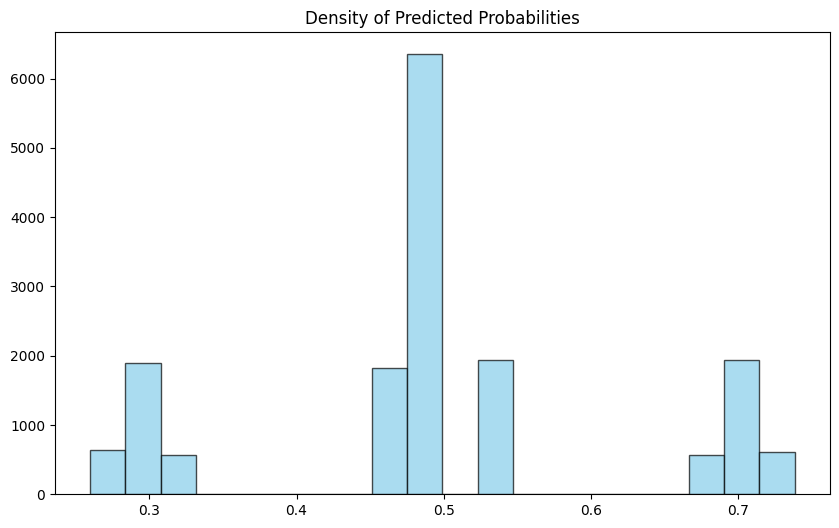

In [90]:
## graph the density of the predicted probabilities
import matplotlib.pyplot as plt

# Plot the density of the predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Density of Predicted Probabilities')


/tmp/ipykernel_2247/1532655907.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_group_means = df.groupby(['distance_group', 'p1_vs_p2']).agg(


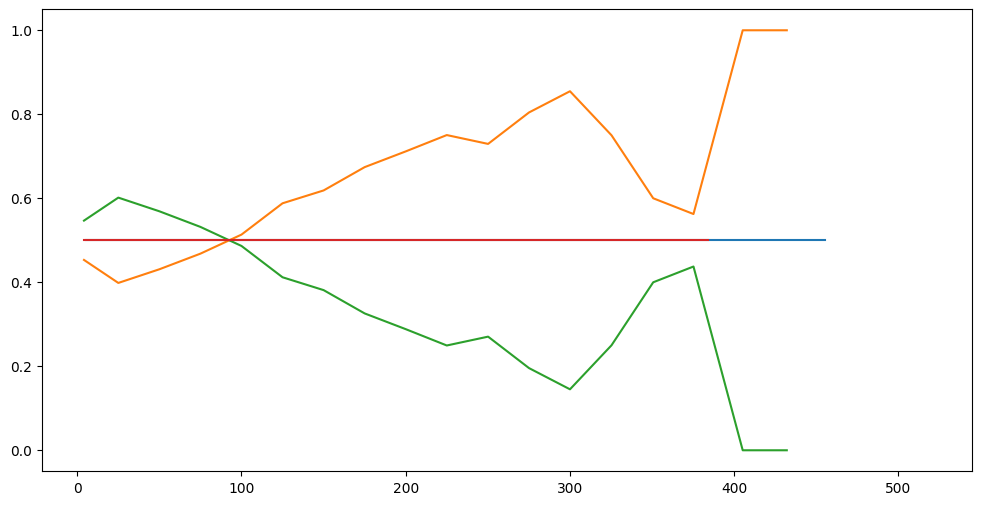

In [ ]:
df.head()

## group distance into 50 unit bins, find mean of p1_kill
## plot grouped by p1_vs_p2
df['distance_group'] = pd.cut(df['distance'], bins=range(0, 1000, 25))
distance_group_means = df.groupby(['distance_group', 'p1_vs_p2']).agg(
    p1_kill=('p1_kill', 'mean'),
    min_value=('distance', 'min')
).reset_index()
distance_group_means
## plot line plot by distance_group
plt.figure(figsize=(12, 6))

## plot line plot color = p1_vs_p2, x = min_value, y = p1_kill
for name, group in distance_group_means.groupby('p1_vs_p2'):
    plt.plot(group['min_value'], group['p1_kill'], label=name)
    ## add legend for color
    

## add legend FOR COLOR
plt.legend(title='p1_vs_p2')
plt.xlabel('Distance')
plt.ylabel('Mean p1_kill')
plt.title('Mean p1_kill by Distance Group')


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Build the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=50, 
    max_features=5, 
    min_samples_split=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc}')

# Print the first few predicted probabilities
print('Predicted probabilities for kill = 1:')
print(y_pred_proba[:10])

ROC AUC Score: 0.6112553493611381
Predicted probabilities for kill = 1:
[0.43105525 0.61440577 0.84882918 0.57421685 0.53770366 0.52124238
 0.83835955 0.70504373 0.44965078 0.45751862]


In [54]:
## sort rows by predicted probability
df['predicted_probability'] = rf_model.predict_proba(X)[:, 1]
df.sort_values(by='predicted_probability', ascending=False, inplace=True)
df.head()

,title,map,mode,id,series_id,start_time_s,distance,p1_kill_in_prev_5000ms,p2_kill_in_prev_5000ms,p2_weapon_type,p1_weapon_type,kill,predicted_probability
71468,ww2,Sainte Marie du Mont,Hardpoint,5c2515c5-d969-521d-a524-547caeeae79b,pro1-a3-3,1519173747,49.578221,1,0,2,2,0,1.0
60500,ww2,London Docks,Hardpoint,8b9bd406-b268-5772-8de3-692872a1561e,pro1-b4-10,1521682513,116.468880,1,0,2,2,0,1.0
60220,ww2,London Docks,Hardpoint,88113730-503b-5b03-9037-c6bd5a1f403d,pro1-b2-10,1518663619,39.623226,0,0,2,0,0,1.0
50283,ww2,Gibraltar,Hardpoint,987a150d-32df-50c5-96e4-5ad39a7f2021,pro1-a1-7,1516831691,100.284595,0,0,0,0,0,1.0
56739,ww2,London Docks,Hardpoint,417d6606-0732-55d5-97ad-ca36faca5dba,pro1-b2-3,1518563675,105.118980,0,0,2,2,0,1.0


In [9]:
## rows in final_df
final_df.shape

## summary stats of final_df
final_df.describe(percentiles=[.05, .25, .5, .75, .95]).T

# The `describe` method provides a summary of statistics for the DataFrame.
# The `percentiles` parameter is used to include additional percentiles in the summary.
# The `T` at the end transposes the DataFrame for better readability.

# Count the occurrences of each unique value in the character columns
character_columns = ['title', 'map', 'mode', 'p1_weapon_type', 'p2_weapon_type', 'kill']
for column in character_columns:
    print(f"Value counts for {column}:")
    print(final_df[column].value_counts())
    print("\n")

Value counts for title:
title
ww2    81826
Name: count, dtype: int64


Value counts for map:
map
London Docks            31264
Sainte Marie du Mont    18258
Gibraltar               11854
Ardennes Forest         11842
Valkyrie                 8608
Name: count, dtype: int64


Value counts for mode:
mode
Hardpoint    81826
Name: count, dtype: int64


Value counts for p1_weapon_type:
p1_weapon_type
SMG       56704
AR        24803
Pistol      319
Name: count, dtype: int64


Value counts for p2_weapon_type:
p2_weapon_type
SMG       56704
AR        24803
Pistol      319
Name: count, dtype: int64


Value counts for kill:
kill
1    40913
0    40913
Name: count, dtype: int64




In [49]:
means_of_death_counts = filtered_df[['attacker_weapon', 'attacker_weapon_type']].value_counts()
print(means_of_death_counts)

attacker_weapon  attacker_weapon_type
PPSh-41          SMG                     27378
STG-44           AR                       6775
FG 42            AR                       5660
BAR              AR                        780
Machine Pistol   Pistol                    316
Luger            Pistol                      3
MP-40            SMG                         1
Name: count, dtype: int64
